#### ANIRUDH SURESH RAMCHANDRAN 
#### STUDENT ID:917868539

# HW1: Data Gathering

## 1. DATA SCRAPING

- Necessary imports 

In [1]:
from bs4 import BeautifulSoup 
import requests
from IPython.core.display import HTML
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

URL for web pages 

In [2]:
url="https://www.imdb.com/list/ls068082370/"
r=requests.get(url)
r.text
soup=BeautifulSoup(r.text,'html.parser')

In [3]:
Movies=[]
Year=[]
Ratings=[]
Genre=[]
Director=[]
Votes=[]
imdb=[]

In [4]:
table = soup.find('div', class_='lister-list')

In [5]:
movies=table.find_all('div', class_='lister-item mode-detail')
len(movies)

100

In [6]:
# name of the movie parsing
def name_parsing(movie):
  temp_1=movie.find('h3', class_='lister-item-header')
  m_name=temp_1.find('a').text
  # since year is in class lister-item-header
  year_temp=temp_1.find('span',class_='lister-item-year text-muted unbold').text
  return m_name

In [7]:
def year_parsing(movie):  
  temp_1=movie.find('h3', class_='lister-item-header')
  # since year is in class lister-item-header
  year_temp=temp_1.find('span',class_='lister-item-year text-muted unbold').text
  return year_temp

In [8]:
def votes_parsing(movie):
  c=movie.find('span',attrs={'name':'nv'})
  v=c['data-value']
  return v

In [9]:
# ratings parsing
def rating_parsing(movie):
  ra=movie.find('span',class_='ipl-rating-star__rating')
  r=ra.text
  return r

In [10]:
# director parsing 
def director_parsing(movie):
  l=movie.find_all('p',class_='text-muted text-small')[1]
  d=l.find('a').text
  return d


In [11]:
# genre parsing 
def genre_parsing(movie):
  temp_g=movie.find('p',class_="text-muted text-small")
  g_a=temp_g.find('span' ,class_="genre")
  g_a=g_a.get_text()
  g_a=g_a.split()
  if len(g_a)>1:
    g_new=g_a[0]
  else:
    g_new=g_a[0]
  return g_new

In [12]:
def movie_table_gen(movies):
  for movie in movies:
    imdb.append(dict(Movies=name_parsing(movie),
                    Genre=genre_parsing(movie),
                    Year=year_parsing(movie),
                    Ratings=rating_parsing(movie),
                    Director=director_parsing(movie),
                    Votes=votes_parsing(movie)
                    ))
  



In [13]:
url_page_2="https://www.imdb.com/list/ls068082370/?sort=list_order,asc&st_dt=&mode=detail&page=2"
r_2=requests.get(url_page_2)
soup_2=BeautifulSoup(r_2.text,'html.parser')
# print(soup.prettify()[])
# r_2.text
table_2 = soup_2.find('div', class_='lister-list')
movies_2=table_2.find_all('div', class_='lister-item mode-detail')

In [14]:
url_page_3="https://www.imdb.com/list/ls068082370/?sort=list_order,asc&st_dt=&mode=detail&page=3"
r_3=requests.get(url_page_3)
soup_3=BeautifulSoup(r_3.text,'lxml')
table_3 = soup_3.find('div', class_='lister-list')
movies_3=table_3.find_all('div', class_='lister-item mode-detail')


In [15]:
movie_table_gen(movies)

In [16]:
movie_table_gen(movies_2)

In [17]:
movie_table_gen(movies_3)

In [18]:
df = pd.DataFrame(imdb)

In [19]:
df.head()

,Movies,Genre,Year,Ratings,Director,Votes
0,The Shawshank Redemption,Drama,(1994),9.3,Frank Darabont,2295357
1,The Godfather,"Crime,",(1972),9.2,Francis Ford Coppola,1584430
2,The Dark Knight,"Action,",(2008),9,Christopher Nolan,2260143
3,The Godfather: Part II,"Crime,",(1974),9,Francis Ford Coppola,1106984
4,Pulp Fiction,"Crime,",(1994),8.9,Quentin Tarantino,1792527


In [20]:
df.dtypes

Movies      object
Genre       object
Year        object
Ratings     object
Director    object
Votes       object
dtype: object

- getting rid of commas ,\n and other characters

In [21]:
sp_char=["(",")","\n"]
for char in sp_char:
  df['Year']=df['Year'].str.replace(char,'')
  # df['Genre']=df['Genre'].str.replace(char,'')
sp_char=[',']
for char in sp_char:
  df['Genre']=df['Genre'].str.replace(char,'')  

I noticed while parisng that some of the years had a weird 'I' along with the year so i had to remove them 

In [22]:
df['Year'].replace(['I 2008'],'2008', inplace=True)
df['Year'].replace(['I 2015'],'2015', inplace=True)
df['Year'].replace(['I 2013'],'2013', inplace=True)

In [23]:
df.Name = df.Movies.astype(str)
df.Genre = df.Genre.astype('category')
df.Year = df.Year.astype(int)
df.Ratings = df.Ratings.astype('float64')
df.Director = df.Director.astype(str)
df.Votes = df.Votes.astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [24]:
df.Genre = df.Genre.astype('category')

In [25]:
df.Ratings=df.Ratings.astype('float64')

In [26]:
df.head()

,Movies,Genre,Year,Ratings,Director,Votes
0,The Shawshank Redemption,Drama,1994,9.3,Frank Darabont,2295357
1,The Godfather,Crime,1972,9.2,Francis Ford Coppola,1584430
2,The Dark Knight,Action,2008,9.0,Christopher Nolan,2260143
3,The Godfather: Part II,Crime,1974,9.0,Francis Ford Coppola,1106984
4,Pulp Fiction,Crime,1994,8.9,Quentin Tarantino,1792527


In [27]:
df.dtypes

Movies        object
Genre       category
Year           int64
Ratings      float64
Director      object
Votes          int64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Movies    250 non-null    object  
 1   Genre     250 non-null    category
 2   Year      250 non-null    int64   
 3   Ratings   250 non-null    float64 
 4   Director  250 non-null    object  
 5   Votes     250 non-null    int64   
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 10.5+ KB


### Question #1

In [29]:
# Question #1
min_value_votes=df['Votes'].idxmin()
Min_voted_movie=df['Movies']
print('Minimum votes:',Min_voted_movie[min_value_votes])
print('--------------------------------------------------------------------')
max_value_votes=df['Votes'].idxmax()
Max_voted_movie=df['Movies']
print('Maximum votes :',Max_voted_movie[max_value_votes])

Minimum votes: Zulu
--------------------------------------------------------------------
Maximum votes : The Shawshank Redemption


In [30]:
df.Genre.value_counts().values

array([67, 46, 33, 27, 24, 21, 19,  4,  4,  3,  2])

### Question #2

Bar plot of Genre vs. Movie Count


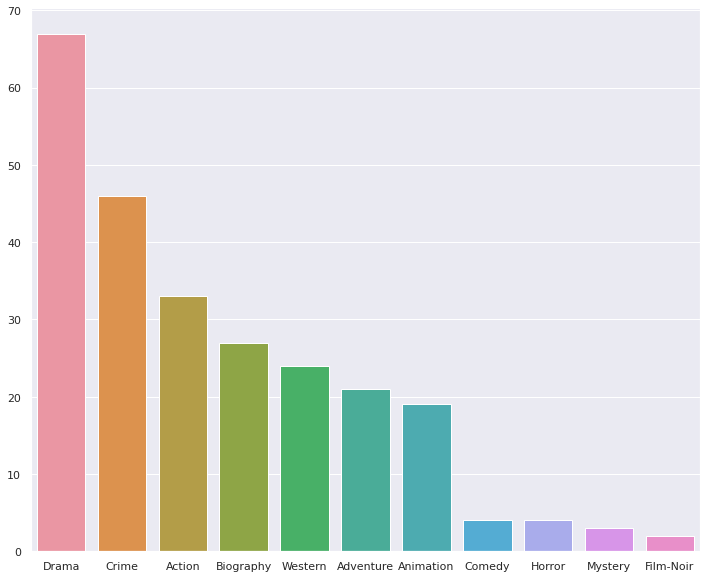

In [31]:
# Question #2

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(df.Genre.unique(),df.Genre.value_counts().values)
print('Bar plot of Genre vs. Movie Count')

### Question #3

In [32]:
# Question #3
print('Top 5 Directors with the most number of movies in the Top 250 List.')
print('--------------------------------------------------------------------')
print(df['Director'].value_counts().head(5))

Top 5 Directors with the most number of movies in the Top 250 List.
--------------------------------------------------------------------
Steven Spielberg     7
Christopher Nolan    7
Martin Scorsese      7
Stanley Kubrick      7
Alfred Hitchcock     6
Name: Director, dtype: int64


## 2.  Database access

In [33]:
# The Project ID
project_id = 'home-work-292118'


In [34]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')
import pandas as pd


Authenticated


### QUESTION #1 TO FIND THE 40 MOST frequent storm event types between years 1950 and 2000

In [35]:
df_noaa = pd.io.gbq.read_gbq('''SELECT
  LOWER(event_type) as Event_Type,
  COUNT(event_id) as Count_Storms
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE
  _TABLE_SUFFIX BETWEEN '1950' AND '1999'
GROUP BY
  event_type
ORDER BY
  count_storms desc
LIMIT 40
''',project_id,dialect='standard')

In [36]:
df_noaa.head()

,Event_Type,Count_Storms
0,thunderstorm wind,157465
1,hail,123269
2,tornado,43033
3,flash flood,12429
4,heavy snow,11959


In [37]:
noaa_storms=df_noaa.Event_Type
print('40 most frequent storm event types between years 1950 and 2000')
print('----------------------')
for i in range(0,40):
  print(noaa_storms[i])

40 most frequent storm event types between years 1950 and 2000
----------------------
thunderstorm wind
hail
tornado
flash flood
heavy snow
high wind
winter storm
flood
drought
cold/wind chill
heat
winter weather
lightning
ice storm
blizzard
heavy rain
strong wind
dense fog
funnel cloud
high surf
waterspout
hurricane (typhoon)
wildfire
coastal flood
tropical storm
frost/freeze
lake-effect snow
storm surge/tide
rip current
sleet
avalanche
debris flow
dust storm
dust devil
freezing fog
seiche
astronomical low tide
volcanic ash
marine high wind
thunderstorm wind/ trees


In [38]:
print('The top event type is:',noaa_storms[0])

The top event type is: thunderstorm wind


### QUESTION #2
Bar Plot of tornados over each of the five decades, 1950s, 1960s, 1970s, 1980s, and 1990s

In [39]:
df_tornado = pd.io.gbq.read_gbq('''SELECT
  LOWER(event_type) as event_type,
  event_begin_time as Date_Time,
  event_id as event_id
  
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE
  _TABLE_SUFFIX BETWEEN '1950' AND '2000' AND lower(event_type) = 'tornado'

ORDER BY
event_begin_time 

''',project_id,dialect='standard')


In [40]:
df_tornado.head()

,event_type,Date_Time,event_id
0,tornado,1950-01-03 11:00:00,10063615
1,tornado,1950-01-03 11:10:00,10009710
2,tornado,1950-01-03 11:55:00,10009711
3,tornado,1950-01-03 16:00:00,10086808
4,tornado,1950-01-13 05:25:00,9981922


In [41]:
counts =df_tornado.groupby(df_tornado['Date_Time'].dt.year)['event_type'].agg(['count'])

In [42]:
counts.head()
N=10
d=counts.groupby(counts.index//N).sum()
d=d[:-1]
count_tornado=d
count_tornado=count_tornado.values.tolist()
count_tornado

[[5232], [7270], [9371], [9008], [12152]]

- Insipration from this question in stack over flow
- https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists


In [43]:
# creating into a simple list without extra []
tornado_list = []
for i in count_tornado:
    for j in i:
        tornado_list.append(j)
year=[1950,1960,1970,1980,1990]       

In [44]:
tornado_list

[5232, 7270, 9371, 9008, 12152]

Bar Plot of tornados over each of the five decades, 1950s, 1960s, 1970s, 1980s, and 1990s.


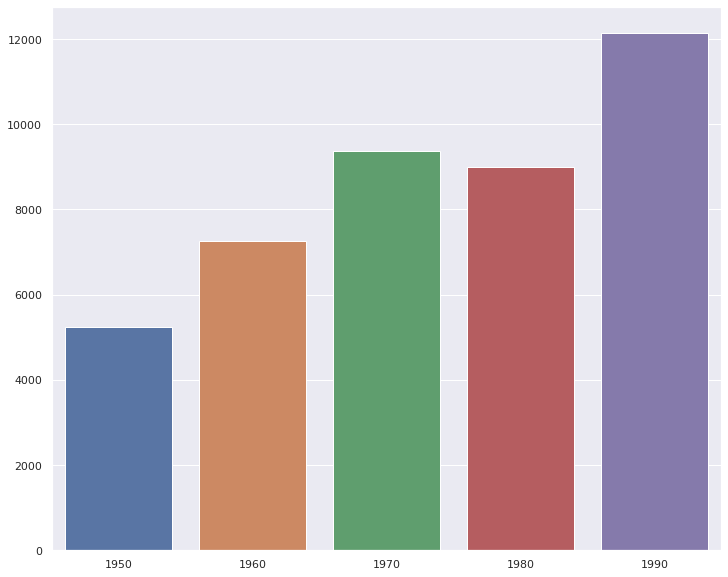

In [45]:

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(year,tornado_list)
print('Bar Plot of tornados over each of the five decades, 1950s, 1960s, 1970s, 1980s, and 1990s.')

## File download: 

In [46]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [47]:
df_polls=pd.read_csv('/content/drive/My Drive/ECS189L/president_primary_polls.csv')

In [48]:
df_polls.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,start_date,end_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,127126,67903,2020,NaN,552,Winston Group,NaN,NaN,Winston Group,385.0,Winston Group,B/C,NaN,rv,rv-d,Live Phone,U.S. President,4/27/20,4/28/20,NaN,False,NaN,False,False,8/4/20 17:22,NaN,https://www.winningtheissues.org/wp-content/up...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,54.00
1,127126,67903,2020,NaN,552,Winston Group,NaN,NaN,Winston Group,385.0,Winston Group,B/C,NaN,rv,rv-d,Live Phone,U.S. President,4/27/20,4/28/20,NaN,False,NaN,False,False,8/4/20 17:22,NaN,https://www.winningtheissues.org/wp-content/up...,primary,DEM,Sanders,13257,Bernard Sanders,17.00
2,122156,65938,2020,NaN,1102,Emerson College,NaN,NaN,Emerson College,88.0,Emerson College,A-,479.0,lv,lv-d,IVR/Online,U.S. President,4/26/20,4/28/20,NaN,False,NaN,False,False,4/28/20 19:01,NaN,https://emersonpolling.reportablenews.com/pr/a...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,67.98
3,122156,65938,2020,NaN,1102,Emerson College,NaN,NaN,Emerson College,88.0,Emerson College,A-,479.0,lv,lv-d,IVR/Online,U.S. President,4/26/20,4/28/20,NaN,False,NaN,False,False,4/28/20 19:01,NaN,https://emersonpolling.reportablenews.com/pr/a...,primary,DEM,Sanders,13257,Bernard Sanders,23.66
4,121552,65756,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,YouGov,B,585.0,lv,lv-d,Online,U.S. President,4/12/20,4/14/20,NaN,False,NaN,False,False,4/15/20 09:11,NaN,https://docs.cdn.yougov.com/6fdl23u606/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.00


In [49]:
df_polls.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'start_date',
       'end_date', 'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'created_at', 'notes', 'url', 'stage', 'party',
       'answer', 'candidate_id', 'candidate_name', 'pct'],
      dtype='object')

In [50]:
df_polls['candidate_name'].value_counts()

Bernard Sanders        1289
Joseph R. Biden Jr.    1285
Elizabeth Warren       1182
Pete Buttigieg         1096
Amy Klobuchar          1082
                       ... 
Nathan Bloxham            1
Nancy Pelosi              1
Marco Rubio               1
Dwayne Johnson            1
Kyrsten Sinema            1
Name: candidate_name, Length: 79, dtype: int64

### QUESTION #1

In [51]:
print('The number of unique presidential candidates on the ballots overall:')
print('--------------------------------------------------------------------')
df_polls['candidate_name'].nunique()

The number of unique presidential candidates on the ballots overall:
--------------------------------------------------------------------


79

### QUESTION #2

In [52]:
print('The average sample size in the national polls in 2020 is:')
print('---------------------------------------------------------')
df_polls['sample_size'].mean()

The average sample size in the national polls in 2020 is:
---------------------------------------------------------


1594.0069626693803